<h1>
<center>
Assignment 1: Regression
</center>
</h1>
<center>
CS 4262/5262 - Foundations of Machine Learning<br>
Vanderbilt University, Spring 2023<br>
Due: Check Brightspace
</center>
<hr>
<br>In this first assignment, you will have a chance to implement linear and polynomial regression models. In addition to programming tasks (marked with #TODO), there are some short-answer questions throughout the notebook. Please do not hesitate to ask for clarification. 

### Please enter your name:  
Tanvi A Hadgaonkar

---
## Part 1: Dataset
We will be using a data set describing California housing. The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). 

The data set contains several input features, including the median income, the average number of rooms, as well as average number of bedrooms, in the census block group. There are a large number of outliers in this group since many of the units were unoccupied due to their being hotels or other units at the time of the census. Thus, we will use the median income as the main feature we track (Note: the units for median income are not needed for this assignment, but are likely not in $100,000s!).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.

You can learn more about the data here: https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import random
import sklearn.datasets 
import time

In [2]:
'''
Fetches data of interest: median California house price for an average number of rooms (in the 1990s).
@return median household income (numpy.ndarray), median price of house (numpy.ndarray)
'''
def fetch_housing_data():
    from sklearn.datasets import fetch_california_housing
    housing_data = fetch_california_housing()
    median_income = housing_data.data[:,0]
    median_price = housing_data.target
    return median_income, median_price 


'''
Renders a simple (x,y) plot. 
@param x (numpy.ndarray) - median income of group (census values)
       y (numpy.ndarray) - median price of house 
'''
def simple_plot(x,y):
    plt.scatter(x,y)
    plt.title('California Housing')
    plt.xlabel('Median Income of Group')
    plt.ylabel('Median Price ($100,000s)')
    plt.show()

**Run the two functions above to display a plot of the data. Based on the plot, do you think linear regression will be able to effectively model the data? Why or why not?**

Response:<br>
As the plot comes out to be a scattered plot, the data appears to have a non linear relationship, which makes it difficult to use the linear regression model. As for linear regression, the independent variable(median_income) and the dependent variable(median_price) do not have a linear plot.


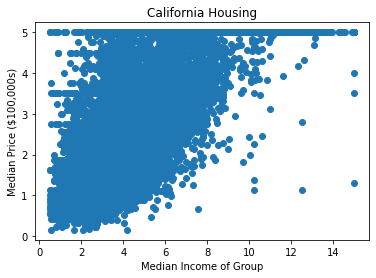

In [3]:
#TODO
# Run the functions here to set values for the variables median_income, and median_price

median_income, median_price = fetch_housing_data()
simple_plot(median_income, median_price)


The `split_train_test()` function below will split the data into a training set and test set. Run the cell (no need to call the function yet).

**What is the definition of overfitting? Why is it necessary to have both training and test sets?**

Response:<br>
1.Overfitting is when a model is trained the training data too well and does not work on the unseen data. This happens mainly because the model gets to complex and starts to capture a noise in the training data.

2.As the training set is used to fit the model and the test set is used to evaluate the performance of the unseen data, we can compare compare both the sets to determine whether the model is an overfit or an underfit. This way we can ensure that the model generalizes the unseen data well and not just memorizing the training set.


In [4]:
'''
Partitions a dataset into a training set and a test set (80/20 split, respectively). 
Shuffles dataset before splitting. 
@param x - data inputs (numpy.ndarray)
       y - data targets (numpy.ndarray)
@return training set inputs, 
        training set targets, 
        test set inputs,
        test set targets (all numpy.ndarray)
'''
def split_train_test(x, y):
    xy = list(zip(x, y))
    random.shuffle(xy)
    x, y = zip(*xy)
    
    split = int(len(x)*0.8)
    train_x = np.array(x[:split])
    train_y = np.array(y[:split])
    test_x = np.array(x[split:])
    test_y = np.array(y[split:])
    
    train_y = np.reshape(train_y, (len(train_y),1))
    test_y = np.reshape(test_y, (len(test_y),1))
    
    return train_x, train_y, test_x, test_y

---
## Part 2: Simple Linear Regression
For the `SimpleLinearRegressionModel` class below, fill in the incomplete methods using their respective descriptions. All methods you should fill out are marked with a #TODO. This model uses a Mean Squared Error cost function and gradient descent to optimize the parameters. 

In [5]:
class SimpleLinearRegressionModel():
    
    '''
    Implementation of simple linear regression using gradient descent
    @param x (numpy.ndarray) - training set of 'single-feature' inputs
           y (numpy.ndarray) - training set of corresponding targets
           theta (numpy.ndarray) - model parameters in the form of [intercept, coefficient]
           alpha (float) - gradient descent step size
    '''
    def __init__(self, x, y, theta, alpha):
        self.x = x
        self.y = y
        self.theta = theta
        self.alpha = alpha
     
    '''
    Equation for the regression line. 
    input x_i (float) - single input feature
    @return corresponding model output (float)
    '''
    #TODO 
    def h(self, x_i):
        x_bar = np.array([1,x_i])
        h = np.dot(self.theta, x_bar)
        return h
    
    '''
    Renders a plot of the training data and the regression line based on current model parameters.
    ''' 
    def plot_current_model(self):
        reg_line_y = [self.h(x_i) for x_i in self.x]
        plt.scatter(self.x, self.y)
        plt.plot(self.x, reg_line_y, color='green')
        plt.title('California Housing')
        plt.xlabel('Average Number of Rooms')
        plt.ylabel('Median Price ($100,000s)')
        plt.show()
    
    '''
    Loss function measuring mean squared error of the regression line for a given training set and model parameters. 
    @return MSE based on the current parameters (float)
    '''
    #TODO
    def J(self):
        m = len(self.y)
        sum_ = 0
        for i in range(m):
            h_i = self.h(self.x[i])
            tmp = (h_i - self.y[i]) ** 2
            sum_ += tmp
        J = sum_ / (2*m)
        return J
    
    '''
    Update the model parameters (i.e. the two theta values) for one gradient descent step. Hint: this involves 
    computing partial derivatives. 
    '''
    #TODO
    def gradient_descent_step(self):
        m = len(self.y)
        derive_theta_0 = 0
        derive_theta_1 = 0
        for i in range(m):
            h_i = self.h(self.x[i])
            derive_theta_0 += (h_i - self.y[i]) * 1
            derive_theta_1 += (h_i - self.y[i]) * self.x[i]
        update_theta_0 = (self.alpha / m) * derive_theta_0
        update_theta_1 = (self.alpha / m) * derive_theta_1
        theta_0_prime = self.theta[0] - update_theta_0
        theta_1_prime = self.theta[1] - update_theta_1
        self.theta = np.concatenate((theta_0_prime, theta_1_prime),axis=0)
        gradient = max(update_theta_0, update_theta_1)
        return gradient, theta_0_prime, theta_1_prime
        
        
    '''
    Run gradient descent to optimize the model parameters.
    Keep track of the value of the cost function. You may change the default threshold for convergence.
    @param threshold (float) - run gradient descent until the magnitude of the gradient is below this value. 
    @return a list storing the value of the cost function after every step of gradient descent (float list)
    '''
    #TODO
    def run_gradient_descent(self, threshold=0.001):
        loss_list = []
        theta_0_list = []
        theta_1_list = []
        iteration = 0
        while threshold:
            gradient, theta_0_prime, theta_1_prime = self.gradient_descent_step()
            #print("***iteration", iteration, "*** current gradient is:", round(gradient[0],4), " theta_0 is:", round(theta_0_prime[0],4), " theta_1 is:", round(theta_1_prime[0],4))
            iteration += 1
            theta_0_list.append(theta_0_prime[0])
            theta_1_list.append(theta_1_prime[0])
            J_iteration = self.J()
            loss_list.append(J_iteration)
            if abs(gradient[0]) > threshold:
                continue
            else:
                break
        print("*** final iteration", iteration, "*** current gradient is:", round(gradient[0],4), " theta_0 is:", round(theta_0_prime[0],4), " theta_1 is:", round(theta_1_prime[0],4))
        return loss_list, theta_0_list, theta_1_list
    
    '''
    Renders plot of MSE at each iteration of gradient descent
    @param losses (float list) - MSE after every gradient descent step 
    '''
    def plot_MSE_loss(self, losses):
        plt.plot(range(len(losses)), losses)
        plt.title('Learning Curve')
        plt.xlabel('Number of Steps')
        plt.ylabel('MSE Loss')
        plt.show()

Before applying this model to the California housing dataset, let's test your code on a smaller dataset. In the debugging function below, first create a small set of 25 training examples ((x,y) pairs) that have an approximately linear relationship. You can do so by first generating pairs that have a perfect linear relationship, then adding a bit of random noise (as much magnitude as you like). Then, run your Simple Linear Regression model on this dataset and display the plot of the final regression line, superimposed on the 25 datapoints (call the `plot_current_model()` method). 

In [6]:
train_x, train_y, test_x, test_y = split_train_test(median_income,median_price)
train_x_debug = train_x[:25]
train_y_debug = train_y[:25]
theta_debug = np.array([0.01,0.01])

*** final iteration 23 *** current gradient is: -0.0009  theta_0 is: 0.1409  theta_1 is: 0.503


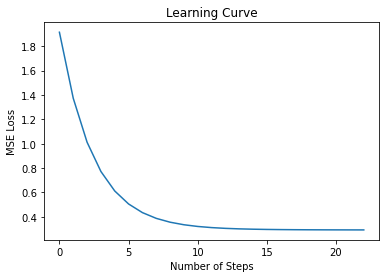

In [7]:
'''
Function for debugging the simple linear regression model.
'''
#TODO
def debug_SLR_model():
     SLR = SimpleLinearRegressionModel(train_x_debug, train_y_debug, theta_debug, 0.01)
     SLR.plot_MSE_loss(SLR.run_gradient_descent()[0])

debug_SLR_model()

If your plot seems to run through your data, then your model looks like it'll work. Next, partition the California housing data into a training set and a test set (use the `split_train_test()` function from Part 1). 

Once you have partitioned the data, run the training set through new instances of `SimpleLinearRegression`. Try a value within the [$-5$,$5$] range for $\theta_0$ and a value within the [$-0.25$,$1$] range for $\theta_1$.

Use the `plot_MSE_loss()` method to display the learning curve for three different step sizes (alpha): 0.01, 0.1, and 0.5.

**How do the learning curves differ? What can you infer about the effect of changing alpha, particularly as it increases/decreases? Are there values of alpha that do not seem to work? Does your initial guess for $\theta$ seem to influence values of alpha? Can you modify either alpha or theta to get better results?**

Response:<br>

A smaller learning rate (alpha) value means will make the model take smaller steps in the direction of the gradient, which can lead to a more stable learning process but also a longer convergence time. A larger learning rate (alpha) makes the model take larger steps in the direction of the gradient, which leads to a faster convergence time but also a higher risk of overshooting the minimum and overfitting the data. The alpha values that are too high or too low would not work. Just like when the alpha = 0.5. The initial guess values of $\theta$ does not change the value of alpha but it can change the shape of the learning curve. Modifying the values of alpha or $\theta$ can help to get better results, as the optimal value of alpha is problem dependentt and it is best to try multiple values to find the best one. $\theta$ can also be modified to get better results, by adjusting the initial values or by using a different optimization algorithm.


In [8]:
# Assess the different step sizes here (next four cells).
train_x, train_y, test_x, test_y = split_train_test(median_income,median_price)

*** final iteration 23 *** current gradient is: 0.001  theta_0 is: 0.8432  theta_1 is: 0.3395


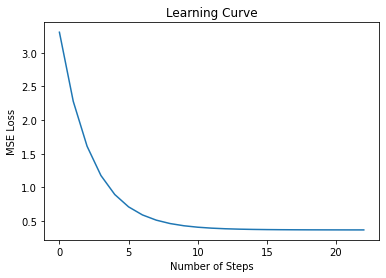

In [9]:
alpha1 = 0.01
theta_initial = np.array([1,1])
#TODO - run an instance of the model and plot the learning curve
SLR = SimpleLinearRegressionModel(train_x, train_y, theta_initial, 0.01)
SLR.plot_MSE_loss(SLR.run_gradient_descent()[0])

*** final iteration 68 *** current gradient is: -0.001  theta_0 is: 0.569  theta_1 is: 0.3997


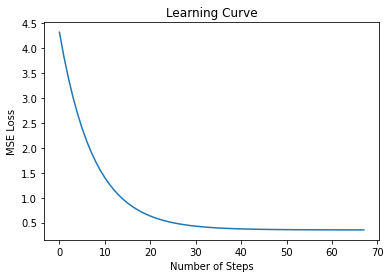

In [10]:
alpha2 = 0.1
#TODO
SLR = SimpleLinearRegressionModel(train_x, train_y, theta_initial, 0.1)
SLR.plot_MSE_loss(SLR.run_gradient_descent()[0])


C:\Users\tanvi\AppData\Local\Temp/ipykernel_5084/3704748482.py:50: RuntimeWarning: overflow encountered in add
  sum_ += tmp
C:\Users\tanvi\AppData\Local\Temp/ipykernel_5084/3704748482.py:49: RuntimeWarning: overflow encountered in square
  tmp = (h_i - self.y[i]) ** 2
C:\Users\tanvi\AppData\Local\Temp/ipykernel_5084/3704748482.py:66: RuntimeWarning: overflow encountered in add
  derive_theta_1 += (h_i - self.y[i]) * self.x[i]
C:\Users\tanvi\AppData\Local\Temp/ipykernel_5084/3704748482.py:70: RuntimeWarning: invalid value encountered in subtract
  theta_1_prime = self.theta[1] - update_theta_1


*** final iteration 326 *** current gradient is: nan  theta_0 is: nan  theta_1 is: nan


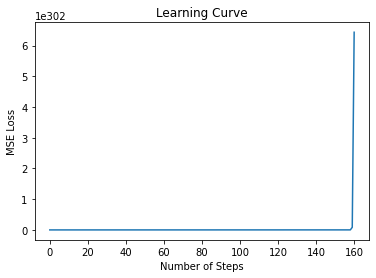

In [11]:
alpha3 = 0.5
#TODO
SLR = SimpleLinearRegressionModel(train_x, train_y, theta_initial, 0.5)
SLR.plot_MSE_loss(SLR.run_gradient_descent()[0])

*** final iteration 23 *** current gradient is: 0.001  theta_0 is: 0.8432  theta_1 is: 0.3395


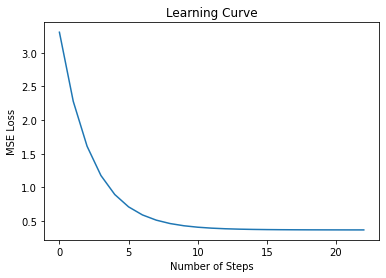

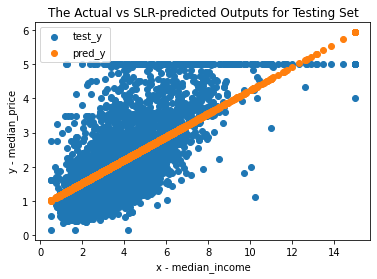

In [12]:
# Evaluate model on test data here (next two cells). 

'''
Make predictions for inputs using a trained SLR model. 
@param model (SimpleLinearRegression) - SLR model with (ideally) optimized parameters
       test_x (numpy.ndarray) - inputs to run through the model 
@return corresponding predictions for the inputs (numpy.ndarray)
'''
#TODO
def SLR_predict(model, test_x):
    test_x_bar = np.c_[np.ones(len(test_x)),test_x]
    y_predict = np.dot(test_x_bar, model.theta)
    return y_predict

'''
Renders a plot showing the actual vs SLR-predicted outputs for a set of inputs. 
@param test_x (numpy.ndarray) - model inputs
       test_y (numpy.ndarray) - corresponding actual outputs 
       pred_y (numpy.ndarray) - corresponding predicted outputs
'''
#TODO
def plot_actual_vs_pred(test_x, test_y, pred_y):
    fig, ax = plt.subplots()
    ax.scatter(test_x, test_y, label='test_y')
    ax.scatter(test_x, pred_y, label='pred_y')
    ax.set_xlabel('x - median_income')
    ax.set_ylabel('y - median_price')
    ax.set_title('The Actual vs SLR-predicted Outputs for Testing Set')
    ax.legend()
    plt.show()
    return

SLR = SimpleLinearRegressionModel(train_x, train_y, theta_initial, 0.01)
SLR.plot_MSE_loss(SLR.run_gradient_descent()[0])
pred_y = SLR_predict(SLR, test_x)
plot_actual_vs_pred(test_x, test_y, pred_y)

*** final iteration 20 *** current gradient is: -0.0009  theta_0 is: 0.122  theta_1 is: 0.4797
5.368163108825684


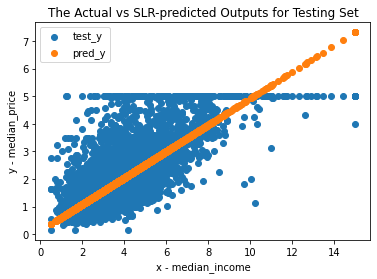

C:\Users\tanvi\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


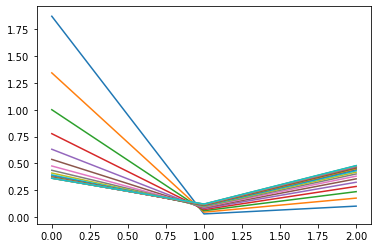

In [13]:
# TODO
# replace with your best starting guess, from above cells
theta = np.array([0.01,0.01])
# replace with the fastest alpha that you got above
alpha = 0.01 

slr = SimpleLinearRegressionModel(train_x, train_y, theta, alpha)
start_time = time.time()
losses = slr.run_gradient_descent()
end_time = time.time()
print(end_time - start_time)
pred_y = SLR_predict(slr, test_x)
plot_actual_vs_pred(test_x, test_y, pred_y)


plt.plot(losses)
plt.show()


---
## Part 3: Polynomial Regression 

In Part 2, we modeled the data with a linear function. Now, we will build a polynomial regression model and apply it to the same California housing data. We will implement gradient descent, and vectorize operations whenever possible.

In class, we learned that the gradient descent update rule can be written as:
   $\theta := \theta - \alpha \cdot \nabla J(\theta)$,
   and that for Batch Gradient Descent, the $j^{th}$ entry of $\nabla_\theta J(\theta)$ can be expressed as:
 
   $$\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \cdot x_j^{(i)} $$

In the `PolynomialRegressionModel` class below, note that there is a new field `self.degree` in the `init()` method, which specifies the highest polynomial degree in your regression equation. For example, if `self.degree=3`, then the regression equation is $y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + \theta_3 x_i^3$.

**Although we are fitting a nonlinear function to our data, why can polynomial regression be considered a case of multiple linear regression?***

Response:<br>

Despite the non-linearity of the function, polynomial regression can still be considered a case of multiple linear regression because it is still linear in terms of the parameters (coefficients) of the polynomial. To see this, we can express the polynomial function as a linear combination of the powers of x:

$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3

This expression is linear in terms of the parameters and that is why polynomial regression can be considered as a case of multiple linear regression


<br>**First,** complete the function `form_design_matrix()` below. This function should return the design matrix $X$ for polynomial regression, which is a matrix of dimensions $m \times (d+1)$, where $d$ is the degree of the polynomial. Remember to include the intercept term (i.e., append the 'feature' $x_0 = 1$ to each training example, such that the first column of $X$ consists of all 1's. 

In [14]:
'''Converts an array of training set inputs into a design matrix, where rows represent 
training inputs and columns represent input features. 
@param training_inputs (numpy.ndarray) - training set of input features
       degree (int) - highest polynomial degree to extend the design matrix into
@return design matrix including the x_0 'feature' - (numpy.ndarray)
'''
#TODO
def form_design_matrix(training_inputs, degree):
    design_matrix_X = training_inputs
    for i in range(degree+1):
        tmp = np.power(training_inputs,i)
        design_matrix_X = np.vstack((design_matrix_X,tmp))
    design_matrix_X = design_matrix_X[1:]
    design_matrix_X = design_matrix_X.T
    return design_matrix_X
    return

**Next,** before writing any further code, show that the above expression for the jth entry of the gradient ( = $\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \cdot x_j^{(i)} $) indeed corresponds to the jth entry of $\nabla_\theta J(\theta) = X^T(X\theta - y)$. You can write your derivation below using LaTeX, or upload a separate sheet of paper with a hand-written derivation. 



In [15]:
#TODO
# Show your gradient derivation here, or upload derivation as a separate document.

$\nabla_{\theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m (\theta_0 x^{0(i)} + \theta_1 x^{1(i)} + ... + \theta_k x^{k(i)} -y^{(i)}) \cdot x^{j(i)} $

**Then,** complete the methods in the `PolynomialRegressionModel` class using vectorization. Assume that the model's training input will be in the form of a design matrix. A lot of your SLR code can be copied over to this new class— modify your methods accordingly to work for any $d$-degree polynomial. 

In [16]:
class PolynomialRegressionModel():
    
    '''
    Implementation of a Polynomial regression model using MSE and Gradient Descent.
    @param X (numpy.ndarray) - training set of input features, as a design matrix
           y (numpy.ndarray) - training set of corresponding targets
           theta (numpy.ndarray) - model parameters (variable coefficients, in order of increasing variable degree)
           alpha (float) - learning step size
           degree (int) - highest polynomial degree
    '''
    def __init__(self, X, y, theta, alpha, degree):
        self.X = X
        self.y = y
        self.theta = theta
        self.alpha = alpha
        self.degree = degree
             
    '''
    Hypothesis - return model prediction 
    @param X (numpy.ndarray) - design matrix of input features
    @return corresponding model output (float)
    '''
    #TODO
    def h(self, X):
        h = np.dot(X, self.theta)
        return h
    
    '''
    Renders a plot of the training data and the regression line based on current model parameters.
    ''' 
    def plot_current_model(self):
        reg_curve_y = self.h(self.X)
        plt.scatter(self.X[:,1], self.y)
        plt.scatter(self.X[:,1], reg_curve_y, color='green')
        plt.title('California Housing (scaled data)')
        plt.xlabel('Median Income')
        plt.ylabel('Median Price')
        plt.show()
    
    '''
    Cost function measuring mean squared error of the regression line for a given training set and model parameters.
    Vectorize your code - no loops!
    @return MSE based on the current parameters (float)
    '''
    #TODO
    def J(self):
        y_hat = self.h(self.X)
        MSE = np.power((y_hat-self.y.T),2).sum() / len(self.y)
        return MSE
    
    '''
    Update theta for one gradient descent step. Vectorize your code - no loops!
    @return the gradient of the cost function (numpy.ndarray), for use in run_gradient_descent
    '''
    #TODO
    def gradient_descent_step(self):
        y_hat = self.h(self.X)
        gradient_vector = np.dot((y_hat-self.y.T), self.X) / len(self.y)
        self.theta -= self.alpha * gradient_vector[0]
        return gradient_vector[0]
        
       
    '''
    Run gradient descent to optimize the model parameters.
    Keep track of the losses. You may change the default threshold for convergence. 
    Here, we will use a convergence criterion based on the norm of the gradient vector.
    @param threshold (float) - run gradient descent until the absolute norm of the gradient is below this value.
    @return a list storing the value of the cost function after every step of gradient descent (float list)
    '''
    #TODO: add debug statements to show progress if you want (but limit printouts for readability)
    def run_gradient_descent(self, threshold=0.01):
        losses = []
        loss = self.J()
        losses.append(loss)
        
        norm_grad_vec = 1
        while norm_grad_vec > threshold:
            grad_vec = self.gradient_descent_step()
            loss = self.J()
            losses.append(loss)
            norm_grad_vec = np.linalg.norm(grad_vec)
        return losses
    
    '''
    Renders the learning curve of the model during its optmization process. 
    @param losses (float list) - MSE after every gradient descent step 
    '''
    def plot_MSE_loss(self, losses):
        plt.plot(range(len(losses)), losses)
        plt.title('Learning Curve')
        plt.xlabel('Number of Steps')
        plt.ylabel('MSE Loss')
        plt.show()

Next, we will run an instance of the `PolynomialRegressionModel` class with a degree of 3. As feature scaling will help our model to converge more quickly, we can first scale our design matrix (normalize each column to have zero mean, unit variance - except for the column of ones). Here, let's set up the design matrix and perform this feature scaling (you can just execute this code, you do not need to write anything here - but make sure you understand what the code is doing). The resulting scaled design matrix will be your input to `PolynomialRegressionModel` in the next part.

In [17]:
degree = 3
design_mat = form_design_matrix(train_x, degree)
Xz = sc.stats.zscore(design_mat[:,1:]) # scale *except* for the column of ones
m = Xz.shape[0]
ones_vec = np.ones((m,1))
design_mat_scaled = np.hstack((ones_vec,Xz))

**Now,** run an instance of the `PolynomialRegressionModel` class using this design matrix. Experiment with the parameter 'alpha' and the initial value of the vector 'theta'. Plot the data and resulting regression curve using the method `plot_current_model`. 

time consuming:  103.82261419296265
Current theta:  [ 2.06445026 -1.18230288  4.32294035 -2.6002572 ] 
Current loss:  0.7222406162887509


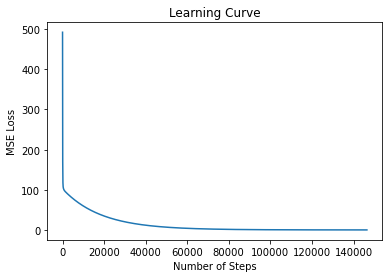

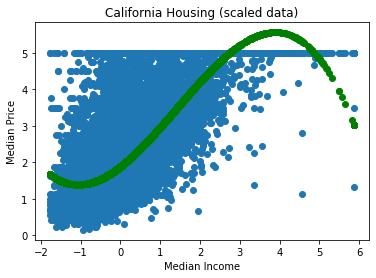

In [18]:
#TODO
# Run an instance of the Polynomial Regression Model with a degree of 3 on the California housing data here. 
alpha = 0.01

# select a starting theta that will converge quickly, as you do this homework refine your best guess

theta_init = np.array([20, -80, 160, -80.0]) 
#theta_init = np.reshape(theta_init, (degree+1,1))

# now call the PRM class you created, and plot the losses and final regression curve

prm = PolynomialRegressionModel(design_mat_scaled, train_y, theta_init, alpha, degree)
start_time = time.time()
losses = prm.run_gradient_descent()
end_time = time.time()
print("time consuming: ", end_time - start_time)
print("Current theta: ",prm.theta, "\nCurrent loss: ", losses[-1])
prm.plot_MSE_loss(losses)
prm.plot_current_model()

**What do you foresee will happen if you apply this model to the held-out test set?**

Response:<br>

What i forsee is if the 3-degree polynomial regression model has been trained and evaluated properly, it's likely that it will perform well on the held-out test set. The 3-degree polynomial has the capacity to capture more complex patterns in the data, including curvature and non-linearity, which may lead to more accurate predictions compared to a simple linear regression model.

**Lastly,** as an alternative to running gradient descent for linear regression, one can solve directly for the value of $\theta$ that minimizes the least-squares cost function $J(\theta)$, using the equation:
$$ \theta = (X^T X)^{-1} X^T y $$

Please fill in the method `closed_form_solution()` below, using this equation. Run this using the feature-scaled design matrix constructed above, and report the value of $\theta$ it returns, and compare it to the solution you obtained using gradient descent. 

Note:  your predictions will be the same regardless of whether you use the scaled or non-scaled version of the design matrix (optionally, you can check this on your own!). However, for the sake of comparing the values of $\theta$, you can use the feature-scaled design matrix here.

In [19]:
'''
Equation for directly solving for theta which minimizes the least-squares cost function J(theta).
@param X (numpy.ndarray) - model input in the form of a design matrix 
       y (numpy.ndarray) - model output 
@return set of theta values for the regression equation that minimizes J(theta) (numpy.ndarray)
'''
#TODO 
from numpy.linalg import inv
def closed_form_solution(X, y):
    closedForm_theta = np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)
    return closedForm_theta

In [20]:
#TODO - run closed_form_solution()

closed_form_solution(design_mat_scaled, train_y)


array([[ 2.06445026],
       [ 0.25764104],
       [ 1.35937866],
       [-0.92570438]])

**Compare gradient descent theta to closed-form solution theta. When you guess an initial value "close" to the closed-form solution, do you think your gradient descent value recovers the closed form version?**<br>

Response:<br>

Gradient descent and the closed-form solution are two different methods for finding the optimal values of the parameters (theta) in a linear regression model.

Gradient descent is an iterative optimization algorithm that starts with an initial guess for theta and iteratively updates the values of theta in the direction of the steepest descent of the cost function. It stops when the cost function reaches a minimum or when a stopping criterion is met. Gradient descent can converge to the optimal values of theta, but it can be sensitive to the choice of the initial guess and the learning rate.

The closed-form solution, also known as the normal equation, is a mathematical formula that directly gives the optimal values of theta. It does not require any iteration or optimization, and it always gives the exact optimal values of theta. However, the closed-form solution is only applicable to linear regression models and requires the inverse of the design matrix XTX, which can be computationally expensive or even impossible if the matrix is singular or ill-conditioned.

If an initial guess for theta is "close" to the closed-form solution, gradient descent is likely to converge quickly to the optimal values of theta. This is because the cost function is a convex function and has only one minimum, so the algorithm will quickly move towards the optimal values. However, if the initial guess is far from the closed-form solution, the algorithm may take many iterations to converge or may not converge at all.


**In what scenario(s) might one choose to use gradient descent over solving the closed-form solution?**

Response:<br>

When the model is non-linear, when the problem is stochastic, when regularization is needed, and when the cost function has multiple local minima.




---
## Part 4: Submission 

Once you're ready to submit, create a 'clean' version of your final solutions, removing any extra debugging code you may have written. Next, in the menu bar, click `Kernel > Restart & Clear Output`. Then run your code from top to bottom, so that all the plots are displayed. Back in the menu bar, click `File > Download as > Notebook (.ipynb)` to download your notebook. Don't forget to answer the short answer questions. 

Please upload this to Brightspace by midnight of the deadline. 